In [1]:
import torch
from model import ConditionalUNet
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os

In [2]:
color_vocab = ["red", "green", "blue", "yellow", "orange", "purple", "pink", "black", "white", "cyan", "magenta"]
color_to_id = {c: i for i, c in enumerate(color_vocab)}

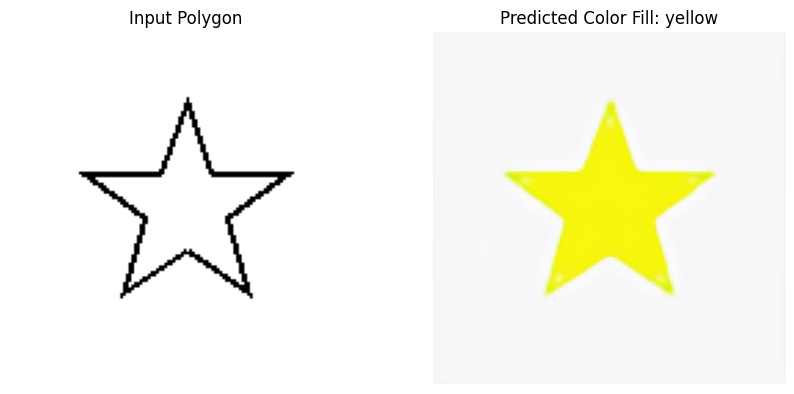

In [4]:
# Load the trained model
model = ConditionalUNet(color_vocab_size=len(color_vocab))
model.load_state_dict(torch.load("best_model/Final_R23_best_lr0.001_lossMSELoss_dim16_bilinearTrue.pth", map_location="cpu"))
model.eval()

# Utility: Load image from path
def load_image(path):
    img = Image.open(path).convert("RGB")
    return transforms.ToTensor()(img).unsqueeze(0)

# --- User Input Section ---

# Ask for polygon image path
img_path = input("Enter path to polygon image (e.g., dataset/validation/inputs/sample.png): ").strip()
if not os.path.exists(img_path):
    raise FileNotFoundError(f"File not found: {img_path}")

# Ask for color
color = input(f"Enter a color ({', '.join(color_vocab)}): ").strip().lower()
if color not in color_to_id:
    raise ValueError(f"Color '{color}' not in allowed list: {color_vocab}")

# Load image and color id
img = load_image(img_path)
color_id = torch.tensor([color_to_id[color]])

# --- Inference ---
with torch.no_grad():
    output = model(img, color_id).squeeze().permute(1, 2, 0).numpy()

# --- Display Results ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Input Polygon")
plt.imshow(img.squeeze().permute(1, 2, 0))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Predicted Color Fill: {color}")
plt.imshow(output)
plt.axis('off')
plt.show()